In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Making Graph

E:\Soft\Ins\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


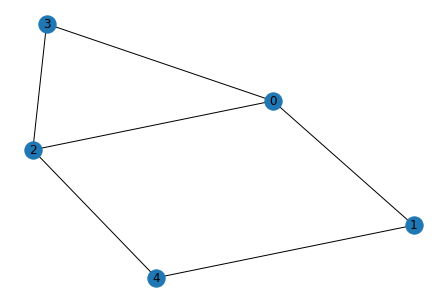

In [2]:
A = np.array([[0,1,1,1,0], [1,0,0,0,1], [1,0,0,1,1], [1,0,0,1,0],[0,1,1,0,0]])
A = np.array([np.array(x) for x in A])
G = nx.from_numpy_matrix(A)
nx.draw(G, with_labels = True)

# Laplacian

In [3]:
D = np.diag(np.sum(A, axis = 1))
L = D - A

# Eigen values and vectors

In [19]:
lambdas, Evectors = np.linalg.eig(L)

In [20]:
inds = lambdas.argsort()
lambdas, Evectors = lambdas[inds], Evectors.T[inds]

### Zero appears as an eigenvalue with multiplicity equal to the number of connected components of the graph:

In [21]:
lambdas = [round(x) for x in lambdas]
lambdas

[-0.0, 1.0, 2.0, 3.0, 5.0]

In [23]:
Evectors

array([[-4.47213595e-01, -4.47213595e-01, -4.47213595e-01,
        -4.47213595e-01, -4.47213595e-01],
       [ 0.00000000e+00, -5.77350269e-01, -6.08094194e-16,
         5.77350269e-01, -5.77350269e-01],
       [ 1.08757571e-01,  7.15375631e-01, -5.69462037e-01,
        -7.86977180e-02, -3.82006748e-01],
       [-6.03022689e-01,  3.01511345e-01, -6.03022689e-01,
         3.01511345e-01,  3.01511345e-01],
       [ 6.65728028e-01, -3.84596916e-01, -5.08570959e-01,
        -1.84002702e-01,  3.41159771e-01]])

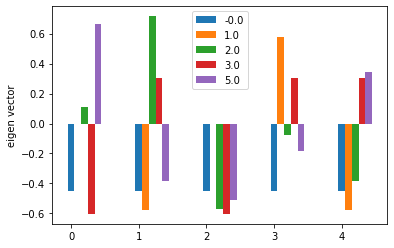

In [25]:
plt.ylabel("eigen vector")
for i in range(5):
    temp = [x+(i/10) for x in range(5)]
    plt.bar(temp, Evectors[i], .1, label = lambdas[i])
plt.legend()

#### For connected graphs, the Laplacian eigenvector u0 associated with the eigenvalue 0 is constant and equal to N**(-1/2) at each vertex.

In [27]:
x = Evectors[0]
x

array([-0.4472136, -0.4472136, -0.4472136, -0.4472136, -0.4472136])

In [28]:
5**(-1/2)

0.4472135954999579

#### graph Laplacian L is a real symmetric matrix, it has a complete set of orthonormal eigenvectors.

In [9]:
print(np.linalg.norm(x))
np.round(Evectors.T.dot(Evectors))

1.0


array([[ 1.,  0., -0., -0., -0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.],
       [-0.,  0.,  0.,  1., -0.],
       [-0.,  0., -0., -0.,  1.]])

#### The eigenvectors associated with larger eigenvalues oscillate more rapidly and are more likely to have dissimilar values on vertices connected by an edge with high weight.

In [29]:
def zero_crossings(vec):
    diff = 0
    count = 0
    for i, vec1 in enumerate(vec):
        for j, vec2 in enumerate(vec):
            if A[i][j] != 0 and vec1*vec2<0:
                count += 1
                diff += abs(vec1-vec2)
    return count, diff

In [33]:
zs = []
diffs = []
for ind, eigenvector in enumerate(Evectors):
    zs.append(zero_crossings(eigenvector)[0])
    diffs.append(zero_crossings(eigenvector)[1])

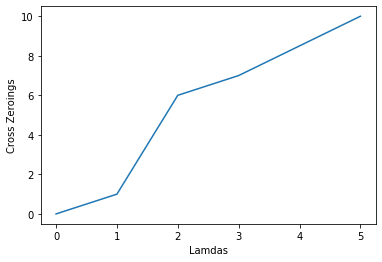

In [34]:
temp = [[lambdas[i], zs[i]] for i in range(len(zs))]
temp.sort(key=lambda x: x[1])
slamdas = [x[0] for x in temp]
szs = [x[1] for x in temp]
plt.xlabel("Lamdas")
plt.ylabel("Cross Zeroings")
plt.plot(slamdas, szs)

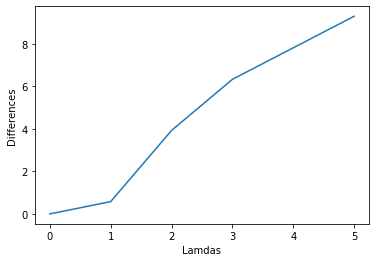

In [35]:
temp = [[lambdas[i], diffs[i]] for i in range(len(diffs))]
temp.sort(key=lambda x: x[1])
slamdas = [x[0] for x in temp]
sdiffs = [x[1] for x in temp]
plt.xlabel("Lamdas")
plt.ylabel("Differences")
plt.plot(slamdas, sdiffs)

# Graph Fourier Transform

In [36]:
def gft(s,U):
    return np.dot(U.T, s)

In [42]:
signals = {'s1': [-10,10,10,10,4], 's2':[1,1,1,1,1],'s3':[2,4,6,8,10], 's4':[10,8,6,4,2]}

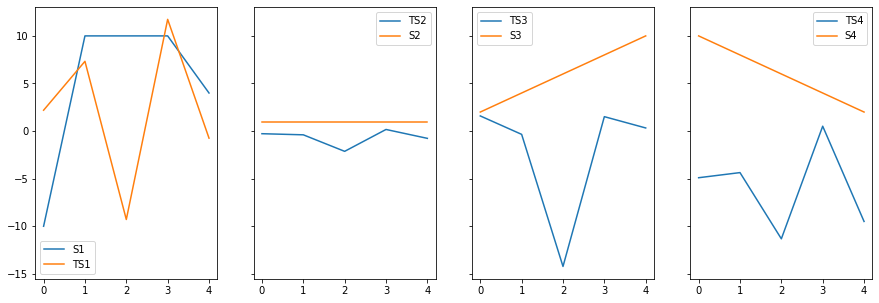

In [43]:
x = range(0,5)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,5))
ax1.plot(x, signals['s1'], label = 'S1')
ax1.plot(x, gft(signals['s1'], Evectors), label = 'TS1')
ax1.legend()
ax2.plot(x, gft(signals['s2'], Evectors), label = 'TS2')
ax2.plot(x, signals['s2'], label = 'S2')
ax2.legend()
ax3.plot(x, gft(signals['s3'], Evectors), label = 'TS3')
ax3.plot(x, signals['s3'], label = 'S3')
ax3.legend()
ax4.plot(x, gft(signals['s4'], Evectors), label = 'TS4')
ax4.plot(x, signals['s4'], label = 'S4')
ax4.legend()

In [41]:
Evectors.T[0].dot(signals['s1'])

-2.2797390635692243